## Implementing the functions of Scikit-Learn on a Classification Model
Using the heart disease dataset

In [35]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

sklearn imports

In [36]:
from sklearn.model_selection import train_test_split            #model seletion - train_test_split - to split the data into training and test sets
from sklearn.ensemble import RandomForestClassifier             #for classification models

In [37]:
#giving the path to a variable
heart_disease_csv = '/home/hp/Documents/College/Coding/Machine Learning/zero_to_mastery_course/csv/heart-disease.csv'

In [38]:
heart_disease = pd.read_csv(heart_disease_csv)
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Data Cleaning and Spliting

In [39]:
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]


In [40]:
X.shape, y.shape

((303, 13), (303,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [42]:
X.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [43]:
y.dtypes

dtype('int64')

In [44]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

#### Fitting the model

In [46]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

#### Predictions

In [47]:
y_preds = clf.predict(X_test)

In [48]:
#predicting using predict_proba()
y_predict_proba = clf.predict_proba(X_test)
y_predict_proba[:10]

array([[0.66, 0.34],
       [0.62, 0.38],
       [0.07, 0.93],
       [0.47, 0.53],
       [0.38, 0.62],
       [0.39, 0.61],
       [0.32, 0.68],
       [0.84, 0.16],
       [0.33, 0.67],
       [0.13, 0.87]])

#### Evaluating the model 
Theory : 
- Evaluation metrics for Classification models are 
    - Score method (R2 method)
    - k-fold cross validation
    - Accuracy
    - AUC/ROC Curve
    - Confusion Matrix
    - Classification Report


In [49]:
clf.score(X_test, y_test)

0.8032786885245902

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y)

array([0.83606557, 0.8852459 , 0.83606557, 0.85      , 0.75      ])

In [51]:
from sklearn.metrics import roc_auc_score
y_prob_positive = y_predict_proba[:, 1]
y_prob_positive
roc_auc_score(y_true=y_test, y_score = y_prob_positive ) 

0.9172113289760349

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred= y_preds)

array([[20,  7],
       [ 5, 29]])

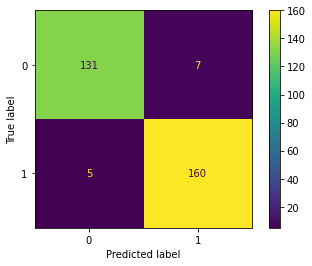

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

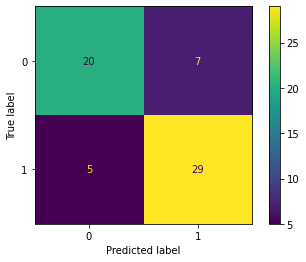

In [54]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
Accuracy = accuracy_score(y_true=y_test,y_pred= y_preds)
Recall = recall_score(y_true = y_test, y_pred = y_preds)
Precision = precision_score(y_true = y_test, y_pred = y_preds)
f1 = f1_score(y_true = y_test, y_pred = y_preds)

Accuracy, Recall, Precision, f1

(0.8032786885245902,
 0.8529411764705882,
 0.8055555555555556,
 0.8285714285714286)

#### Tunning the hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [57]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We'll try to adjust : 
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [63]:
def evaluate(y_true, y_preds):
    Accuracy = accuracy_score(y_true, y_preds)
    Precision = precision_score(y_true, y_preds)
    Recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metrics_dictonary = {
                        "Accuracy" : round(Accuracy,2),
                        "Precision": round(Precision, 2),
                        "Recall" : round(Recall, 2),
                        "f1" : round(f1, 2)
    }

    return metrics_dictonary

In [64]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split the data into train, validation & test sets

train_split = round(0.7 * len(heart_disease_shuffled))      #70% of the data
valid_split = round(train_split + 0.15* len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [65]:
clf.fit(X_train,y_train)
#evaluating on validation set so we can tune the parameters

y_preds = clf.predict(X_valid)

#evaluate the classifier on validation set
baseline_metrics = evaluate(y_valid, y_preds)
baseline_metrics

{'Accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.88, 'f1': 0.85}

In [97]:
np.random.seed(42)
clf2 = RandomForestClassifier(n_estimators=50, max_depth=200 )

clf2.fit(X_train,y_train)

y_preds2 = clf2.predict(X_valid)

clf2_metrics = evaluate(y_valid, y_preds2)
clf2_metrics

{'Accuracy': 0.96, 'Precision': 1.0, 'Recall': 0.92, 'f1': 0.96}

In [82]:
### Using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
grid = {
        'n_estimators' : [50,100,200,300],
        'max_depth' : [None,5,10,20,30],
        'max_features' : ["auto", "sqrt"],
        'min_samples_split' : [2,4,6,8],
        'min_samples_leaf' : [1,2,4,6]
}
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into train and test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size= 0.2)

clf = RandomForestClassifier(n_jobs= 1) 

rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=0)
rs_clf.fit(X_train, y_train)

/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [50, 100, 200, 300]})

In [83]:
rs_clf.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 5}

In [84]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate(y_test, rs_y_preds)
rs_metrics


{'Accuracy': 0.82, 'Precision': 0.84, 'Recall': 0.82, 'f1': 0.83}

In [92]:
from sklearn.model_selection import GridSearchCV
grid_2 = {
        'n_estimators' : [50,100],
        'max_depth' : [None,5,10],
        'max_features' : ["auto"],
        'min_samples_split' : [4,6,8],
        'min_samples_leaf' : [2,4,6]
}
np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)
X= heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2,n_jobs=10 ,cv=5)
gs_clf.fit(X_train, y_train)

/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_jobs=10,
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [50, 100]})

In [93]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 50}

In [94]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics = evaluate(y_test, gs_y_preds)
gs_metrics

{'Accuracy': 0.82, 'Precision': 0.84, 'Recall': 0.82, 'f1': 0.83}

In [98]:
compare_metrics = pd.DataFrame({"Baseline" : baseline_metrics,
                                "By Hand" : clf2_metrics,
                                "Random Search" : rs_metrics,
                                "Grid Search" : gs_metrics})

compare_metrics

,Baseline,By Hand,Random Search,Grid Search
Accuracy,0.82,0.96,0.82,0.82
Precision,0.81,1.00,0.84,0.84
Recall,0.88,0.92,0.82,0.82
f1,0.85,0.96,0.83,0.83


In [ ]:
# import pickle

# #saving an existing model
# pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl", "wb"))
# #load saved model
# loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))